# Aviation Risk Analysis Project

## 1. Business Understanding

### Project Objective
Your company is expanding into aviation and requires an analysis of aviation risks to determine which aircraft are the lowest risk for operation.

**Key Goals:**
- Identify trends in aviation accidents.
- Analyze risk factors for different aircraft.
- Provide actionable recommendations to the business stakeholders.

**Audience**: Business stakeholders (non-technical).


2. Data Understanding

In [232]:
import pandas as pd
import numpy as np

In [234]:
# Loading the data
aviation_data = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)


In [236]:
# Preview the first few rows
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [238]:
# Display basic dataset info
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# 3. Data Preparation.

##    Under this stage I will clean the data for further analysis by removing all the missing values from the provided data set.
###   I will also do data integration and perform data transformation in order develop deeper insights about the dataset

## Data Cleaning

In [242]:
# Identify columns with high missing values
# Missing data converted into a percentage for easy readability and understanding
missing_data = aviation_data.isnull().mean() * 100
# Drop columns with more than 30% missing values
columns_to_drop = missing_data[missing_data > 30].index
aviation_data_cleaned = aviation_data.drop(columns=columns_to_drop)

# Fill remaining missing values
numeric_columns = aviation_data_cleaned.select_dtypes(include=['float64']).columns
categorical_columns = aviation_data_cleaned.select_dtypes(include=['object']).columns

aviation_data_cleaned[numeric_columns] = aviation_data_cleaned[numeric_columns].fillna(
    aviation_data_cleaned[numeric_columns].median()
)
aviation_data_cleaned[categorical_columns] = aviation_data_cleaned[categorical_columns].fillna(
    aviation_data_cleaned[categorical_columns].mode().iloc[0]
)

# Verify cleaning
aviation_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Injury.Severity         88889 non-null  object 
 7   Aircraft.damage         88889 non-null  object 
 8   Registration.Number     88889 non-null  object 
 9   Make                    88889 non-null  object 
 10  Model                   88889 non-null  object 
 11  Amateur.Built           88889 non-null  object 
 12  Number.of.Engines       88889 non-null  float64
 13  Engine.Type             88889 non-null  object 
 14  Purpose.of.flight       88889 non-null

## 3. Creating a smaller summary file for clearer visualization

In [245]:
# creating clean data for tableau
aviation_data_cleaned['Event.Date'] = pd.to_datetime(aviation_data_cleaned['Event.Date'], errors='coerce')
aviation_data_cleaned['Year'] = aviation_data_cleaned['Event.Date'].dt.year

# Select relevant columns, including 'Year'
relevant_columns = ['Make', 'Model', 'Aircraft.damage', 'Total.Fatal.Injuries', 
                    'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Year']

# Create aggregated data for Tableau
tableau_data = aviation_data_cleaned[relevant_columns].copy()

# Group by manufacturer and calculate key metrics, including 'Year'
tableau_data_summary = tableau_data.groupby(['Make', 'Year']).agg(
    Total_Accidents=('Make', 'count'),
    Total_Fatal_Injuries=('Total.Fatal.Injuries', 'sum'),
    Total_Serious_Injuries=('Total.Serious.Injuries', 'sum'),
    Total_Minor_Injuries=('Total.Minor.Injuries', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum')
).reset_index()

# Save to a smaller CSV for Tableau
tableau_data_summary.to_csv('tableau_summary_data.csv', index=False)



In [247]:
# Print the first few rows of the file to inspect its structure
print(df.head())


                       Make  Year Total_Accidents Total_Fatal_Injuries  \
1  107.5 Flying Corporation  2006               1                  1.0   
2                      1200  2005               1                  0.0   
3                 177MF LLC  2014               1                  0.0   
4          1977 Colfer-chan  2001               1                  0.0   
5                1st Ftr Gp  1994               1                  1.0   

  Total_Serious_Injuries Total_Minor_Injuries Total_Uninjured  
1                    0.0                  0.0             1.0  
2                    1.0                  0.0             1.0  
3                    2.0                  0.0             0.0  
4                    0.0                  1.0             1.0  
5                    0.0                  0.0             0.0  


In [249]:
# Load the data into a DataFrame
df = pd.read_csv('tableau_summary_data.csv', header=None)

# Print the first few rows to inspect the issue
print(df.head())

# Step 1: Extract the correct column names from the first row
# The first row is currently split across multiple columns, so we need to combine them
columns = df.iloc[0].values.tolist()

# Clean up the column names
columns = [col.strip() for col in columns]

# Step 2: Assign the columns to the DataFrame
df.columns = columns

# Step 3: Remove the first row (which is now used for column names)
df = df.drop(index=0)

# Step 4: Check if the data is now correctly structured
print(df.head())

# Step 5: Save the cleaned data into a new CSV for Tableau
df.to_csv('structured_data_for_tableau.csv', index=False)


                          0     1                2                     3  \
0                      Make  Year  Total_Accidents  Total_Fatal_Injuries   
1  107.5 Flying Corporation  2006                1                   1.0   
2                      1200  2005                1                   0.0   
3                 177MF LLC  2014                1                   0.0   
4          1977 Colfer-chan  2001                1                   0.0   

                        4                     5                6  
0  Total_Serious_Injuries  Total_Minor_Injuries  Total_Uninjured  
1                     0.0                   0.0              1.0  
2                     1.0                   0.0              1.0  
3                     2.0                   0.0              0.0  
4                     0.0                   1.0              1.0  
                       Make  Year Total_Accidents Total_Fatal_Injuries  \
1  107.5 Flying Corporation  2006               1                  

In [251]:
# Load the data into a DataFrame
df = pd.read_csv('tableau_summary_data.csv', header=None)

# Extract the correct column names from the first row
columns = df.iloc[0].values.tolist()

# Clean up the column names (strip whitespaces and remove any unwanted characters)
columns = [col.strip() for col in columns]

# Assign the columns to the DataFrame
df.columns = columns

# Remove the first row (which is now used for column names)
df = df.drop(index=0)

# Save the cleaned data into a new CSV with explicit comma separation
df.to_csv('structured_data_for_tableau.csv', index=False, sep=',', quoting=1)  # quoting=1 means to quote all strings


In [253]:
df.to_csv('structured_data_for_tableau.csv', index=False, sep=',', quoting=1, encoding='utf-8-sig')


# We now have a clean set of data that can be clearly visualized.

# 4. Data Analysis
## Here I will run various data visualization codes to show a clearer picture of the data

In [257]:
import matplotlib.pyplot as plt

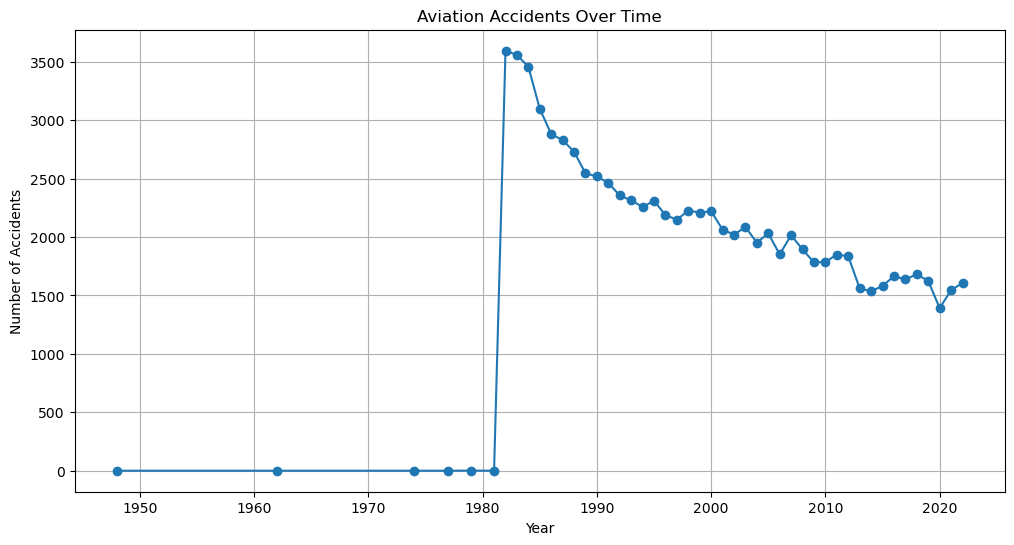

In [259]:
# Convert Event.Date to datetime
aviation_data_cleaned['Event.Date'] = pd.to_datetime(aviation_data_cleaned['Event.Date'], errors='coerce')
aviation_data_cleaned['Year'] = aviation_data_cleaned['Event.Date'].dt.year

# Accident trends over time
accident_trends = aviation_data_cleaned['Year'].value_counts().sort_index()

# Plot trends
plt.figure(figsize=(12, 6))
plt.plot(accident_trends.index, accident_trends.values, marker='o')
plt.title("Aviation Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()


# The above linegraph is a plot showing the number of aviation accidents overtime.

# The graph below shows the top 10 manufacturers whose aircrafts have been involved in accidents

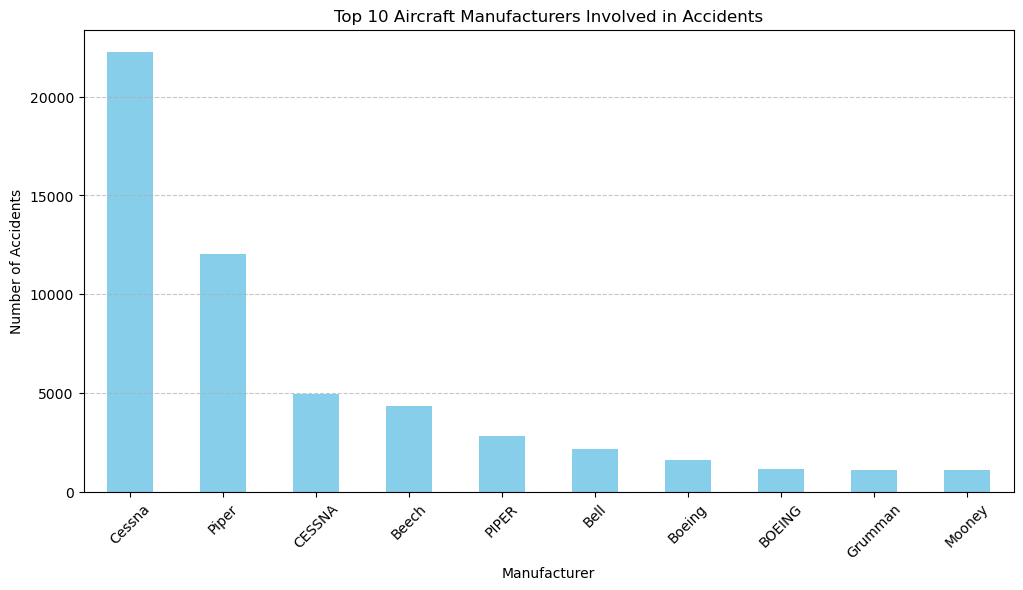

In [263]:
# Top 10 manufacturers by accident count
top_manufacturers = aviation_data_cleaned['Make'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
top_manufacturers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Aircraft Manufacturers Involved in Accidents')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## * From the graph, the cessna aircraft is seen to have reported more accidents than any other aircraft manucturer.
## * From the graph, we can also see that the Mooner, Grumman and Boeing have a low accident record
## * Piper trails Cessna in number of accidents by slightly more than half the number of accidents reported by Cessna
## * Beech and Bell have reported relatively few accidents over the years.

# The pie-chart below shows the proportion of accidents that resulted in each type of aircraft damage (e.g., Substantial, Destroyed, etc.) in the dataset.

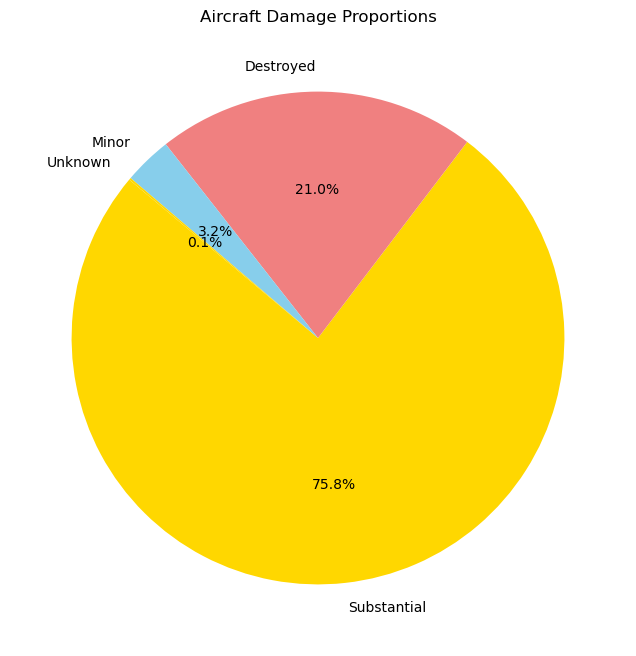

In [267]:
# Damage category proportions
damage_counts = aviation_data_cleaned['Aircraft.damage'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
damage_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'skyblue'])
plt.title('Aircraft Damage Proportions')
plt.ylabel('')
plt.show()


#  Heatmap: Correlation Between Injury Types
## Highlight correlations between injury counts

In [270]:
import seaborn as sns

In [272]:
# Convert fatal injuries to numeric
aviation_data_cleaned['Total.Fatal.Injuries'] = pd.to_numeric(aviation_data_cleaned['Total.Fatal.Injuries'], errors='coerce').fillna(0)

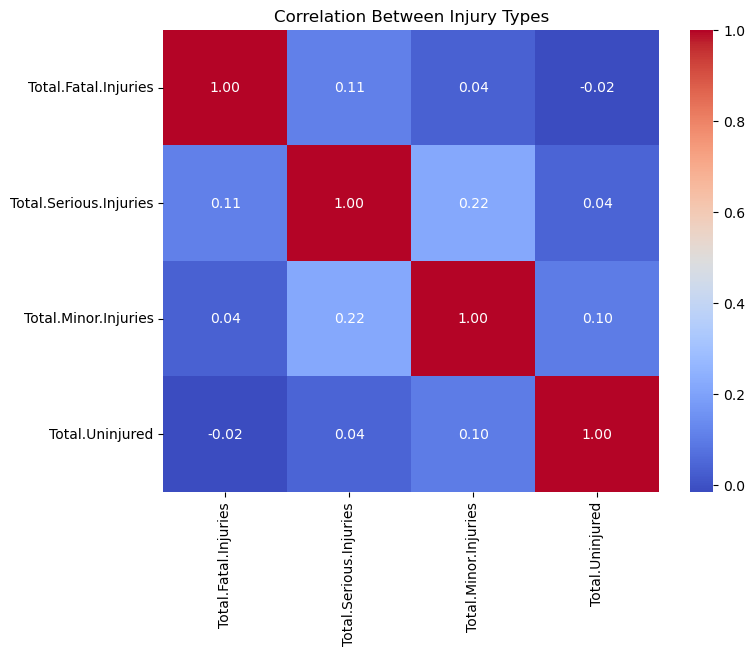

In [274]:
# Select injury columns for correlation
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
injury_data = aviation_data_cleaned[injury_columns].dropna()

# Correlation matrix
correlation_matrix = injury_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Injury Types')
plt.show()


# Recommendations
Aircrafts with high fatality rates should be avoided

* It is more risky to operate aircraft types that report more fatalities, both privately and commercially.
Exclude aircraft models or manufacturers with consistently high fatality incidents from purchase considerations.

* Prioritize Safety for Landing and Takeoff Phases.
Data typically shows that a significant proportion of accidents occur during the Landing and Takeoff phases. These phases are critical for safety.
This therefore shows that it is wise to invest in models that include advanced landing and takeoff technologies, such as enhanced braking systems and automated stability control.
Target Manufacturers with Lower Accident Rates:

* The Boeing and Mooner aircraft manufacturers are seen to have reported fewer accidents in the dataset.
The business should therefore focus on these manufacturers for acquisition, as they demonstrate better overall safety records.

However, it is worth noting that while the Mooner aircraft may be reporting few accidents, its market share is also low. Its low accident record therefore may be more about it being less popular than the likes of Cessna
